In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('titanic.csv',encoding='latin1')
print(df.columns.to_list())
#['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [3]:
#initial inspection
print('\nInformation about the dataset:',)
df.info()
print('\nTotal no. of rows and columns:')
print(df.shape)
print('\nDatatypes for each column:')
print(df.dtypes)


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

Total no. of rows and columns:
(887, 8)

Datatypes for each column:
Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses 

In [4]:
#statistical info
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.1375

In [5]:
#checking data quality
print('\ntotal no. of missing values per column:')
print(df.isnull().sum()) #no missing values present
print('\ntotal duplicate values:')
print(df.duplicated().sum()) #no duplicate values



total no. of missing values per column:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

total duplicate values:
0


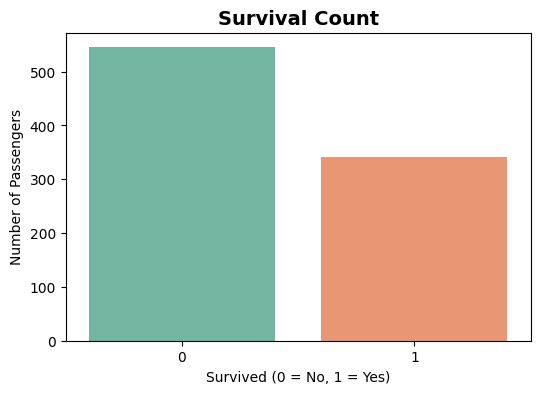

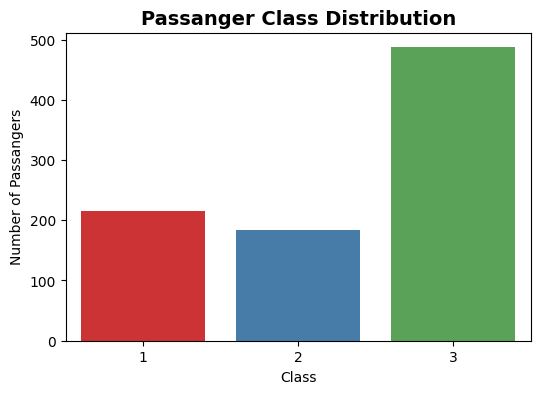

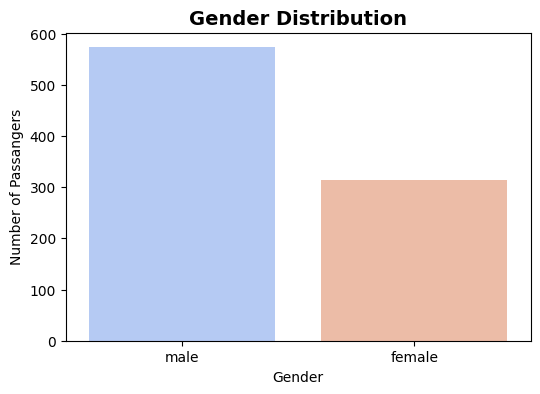

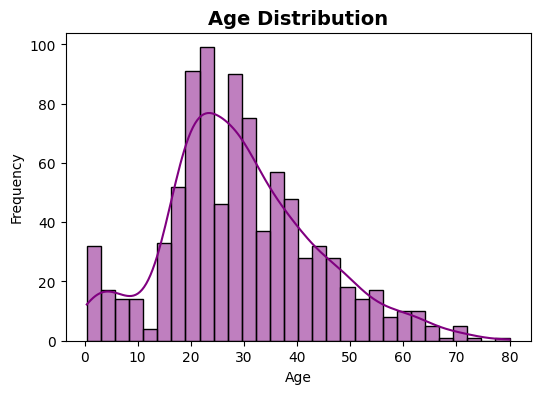

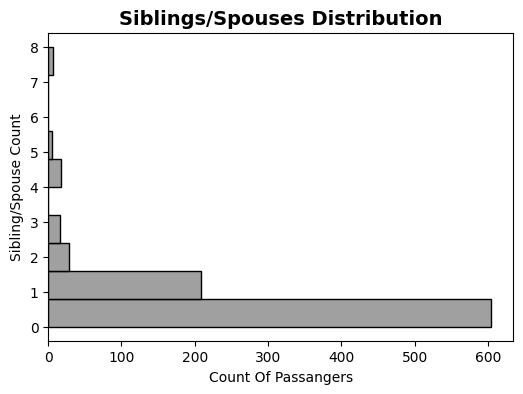

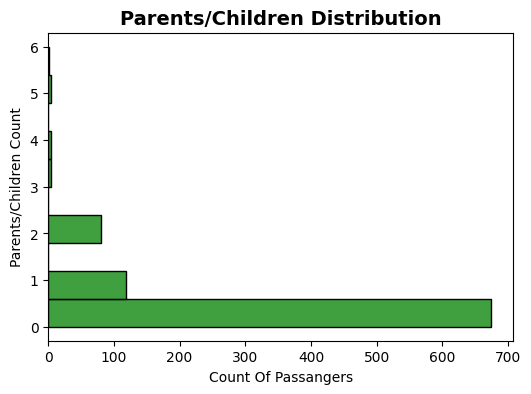

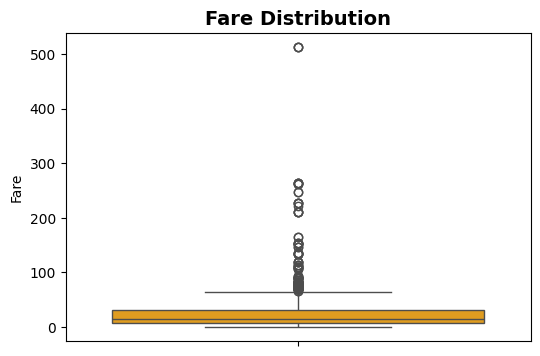

In [6]:
#univariate analysis
#1(survived)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Survived', legend=False, data=df, palette='Set2')
plt.title('Survival Count', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

#2(Pclass)
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Pclass', legend=False, data=df, palette='Set1')
plt.title('Passanger Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Number of Passangers')
plt.show()

#3(sex)
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Sex', legend=False, data=df, palette='coolwarm')
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Passangers')
plt.show()

#4(Age)
plt.figure(figsize=(6,4))
sns.histplot(x='Age', data=df, bins=30, kde=True, color='purple')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#5(Siblings/Spouses Aboard)
plt.figure(figsize=(6,4))
sns.histplot(y='Siblings/Spouses Aboard', data=df, bins=10, color='grey')
plt.title('Siblings/Spouses Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count Of Passangers')
plt.ylabel('Sibling/Spouse Count')
plt.show()

#6(Parents/Children Aboard)
plt.figure(figsize=(6,4))
sns.histplot(y='Parents/Children Aboard', data=df, bins=10, color='green')
plt.title('Parents/Children Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count Of Passangers')
plt.ylabel('Parents/Children Count')
plt.show()

#7(Fare)
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Fare'], color='orange')
plt.title('Fare Distribution', fontsize=14, fontweight='bold')
#plt.xlabel('Count Of Passangers')
#plt.ylabel('Parents/Children Count')
plt.show()

Survived      0      1
Pclass                
1         37.04  62.96
2         52.72  47.28
3         75.56  24.44


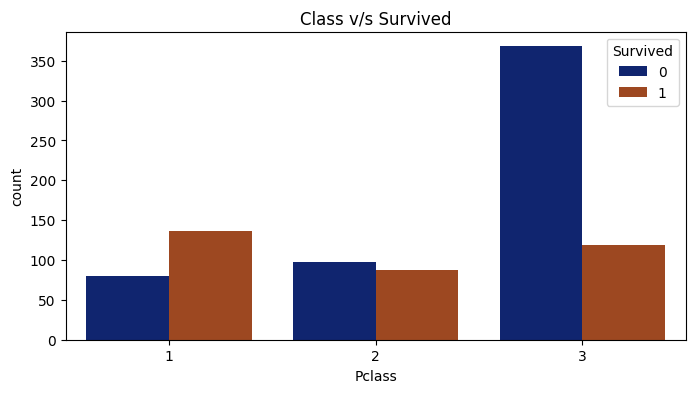

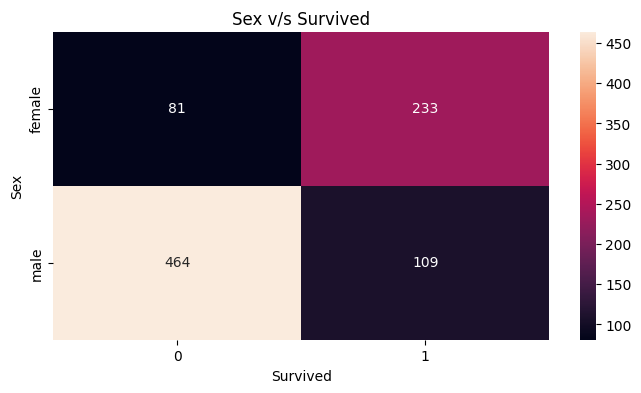

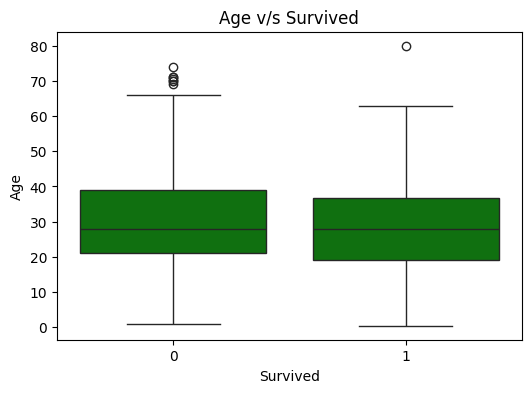

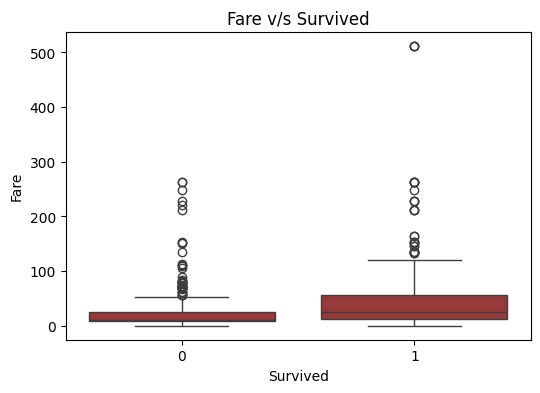

In [40]:
#Bivariate Analysis
#Pclass v/s Survived
plt.figure(figsize=(8,4))
print((pd.crosstab(df['Pclass'],df['Survived'],normalize='index')*100).round(2))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='dark')
plt.title('Class v/s Survived')
plt.show()

#Sex v/s survived
plt.figure(figsize=(8,4))
#sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
sns.heatmap(pd.crosstab(df['Sex'], df['Survived']), annot=True, fmt='d')
plt.title('Sex v/s Survived')
plt.show()

#Age v/s Survived
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age',data=df, color='g')
plt.title('Age v/s Survived', fontsize=12)
plt.show()

#Fare v/s survived
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare',data=df, color='brown')
plt.title('Fare v/s Survived', fontsize=12)
plt.show()



<Figure size 600x400 with 0 Axes>

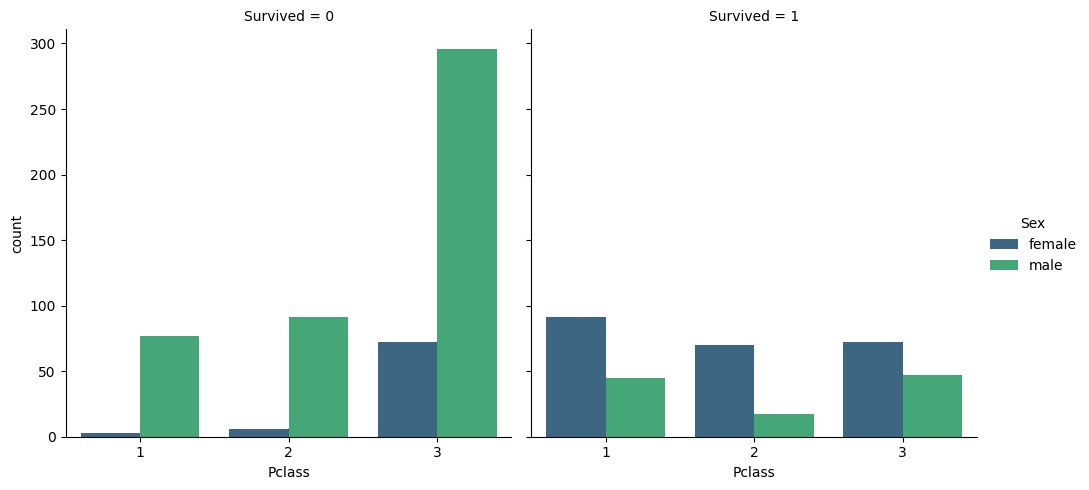

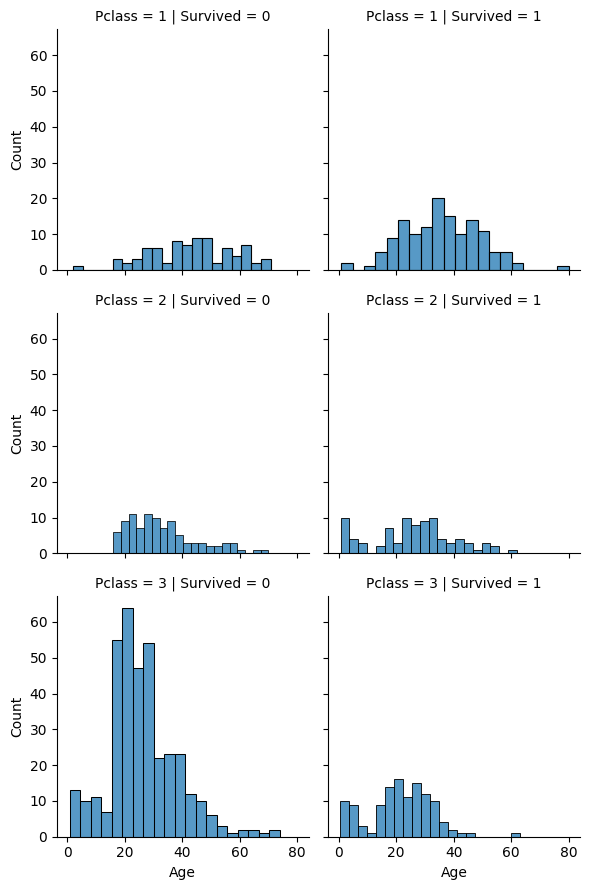

In [ ]:
#Multivariate Analysis
#Pclass-Sex v/s Survived
plt.figure(figsize=(6,4))
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', palette='viridis')
plt.show()

#facergrid
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3)
g.map(sns.histplot, 'Age', bins=20)


Exploratory Data Analysis Summary

Objective:
The objective of this analysis is to explore the Titanic dataset, understand survival patterns, and identify key factors influencing passenger survival.

Dataset Overview:
The dataset contains passenger information including survival status, passenger class, gender, age, family relations, and fare details. The data was inspected for quality and completeness before performing analysis.

Data Quality Check:
No missing values detected
No duplicate records identified
Numerical variables showed reasonable statistical ranges
The dataset was considered suitable for analysis.

Key Insights:

Survival Distribution:-
A larger proportion of passengers did not survive, indicating class imbalance in the target variable.

Passenger Class Impact:-
First-class passengers showed higher survival proportions compared to second and third classes, suggesting socioeconomic influence on survival.

Gender Impact:-
Female passengers had significantly higher survival rates than male passengers, highlighting gender as a strong determinant.

Age Influence:-
Age distribution varied between survivors and non-survivors, indicating demographic influence on survival outcomes.

Combined Feature Effects:-
Multivariate analysis revealed that female passengers in higher classes had the highest survival likelihood, while male passengers in lower classes showed lower survival probability.

Conclusion:
The exploratory analysis indicates that passenger class, gender, and age are key factors affecting survival. These findings provide a strong foundation for building predictive models to estimate survival probability.